# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv',index_col = 'date')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv',index_col = 'date')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col = 'date')

In [3]:
sd = [train, test, full]

for i in sd:
    display('-------------------------------------------------------------------------------------------')
    display(i.info())


'-------------------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_cleaner.i

None

'-------------------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

None

'-------------------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_cleaner.i

None

**Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.**

* C — доля золота в концентрате после флотации/очистки;| 'rougher.output.concentrate_au'
* F — доля золота в сырье/концентрате до флотации/очистки;| 'rougher.input.feed_au'
* T — доля золота в отвальных хвостах после флотации/очистки.| 'rougher.output.tail_au'

Recovery = C*(F-T)/F*(C-T)*100% 


In [4]:
train['recovery'] = (train['rougher.output.concentrate_au']*(train['rougher.input.feed_au']-train['rougher.output.tail_au']))/(train['rougher.input.feed_au']*(train['rougher.output.concentrate_au']-train['rougher.output.tail_au']))*100

In [5]:
print(mean_absolute_error(train['rougher.output.recovery'],train['recovery']))

9.682896147825551e-15


In [6]:
df_train_recovery = train[['rougher.output.recovery','recovery']]
df_train_recovery.head()

,rougher.output.recovery,recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794


**Вывод:** эффективность обогащения рассчитана правильно, среднее абсолютное отклонение минимальное. Визуамльно данные идентичные

**Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?**

In [7]:
pv = list(set(train.columns) - set(test.columns))
pv

['rougher.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.au_pb_ratio',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_ag',
 'final.output.recovery',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_sol',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'final.output.concentrate_pb',
 'final.output.tail_pb',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'recovery',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'f

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Это объекты типа float.
Нет целевых значений 'rougher.output.recovery','final.output.recovery'.

In [8]:
test_2 = test.merge(full[['rougher.output.recovery','final.output.recovery']],on = 'date',how = 'left')
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

In [9]:
test_2.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [10]:
test_2 = test_2.fillna(method='ffill')#заполним предыдущими значениями
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

In [11]:
display(full.isna().sum().sort_values(ascending = False).head(40))
full = full.fillna(method='ffill')#заполним предыдущими значениями
train = train.fillna(method='ffill')#заполним предыдущими значениями

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

***Вывод*** 

Рассмотрел три выборки, в тестовой были пропуски(заполнили предыдущими значениями)- rougher.output.recovery','final.output.recovery'. 

Добаивл целевые столбцы в тестовую выборку. проверили точность расчета rougher.output.recovery,он правильный. 


## Анализ данных

**2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.**

Возможные значения для блока: 

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

In [38]:
inputs = full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']]
rougher = full[['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb']]
primary_cleaner = full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']] 
final = full[['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']]

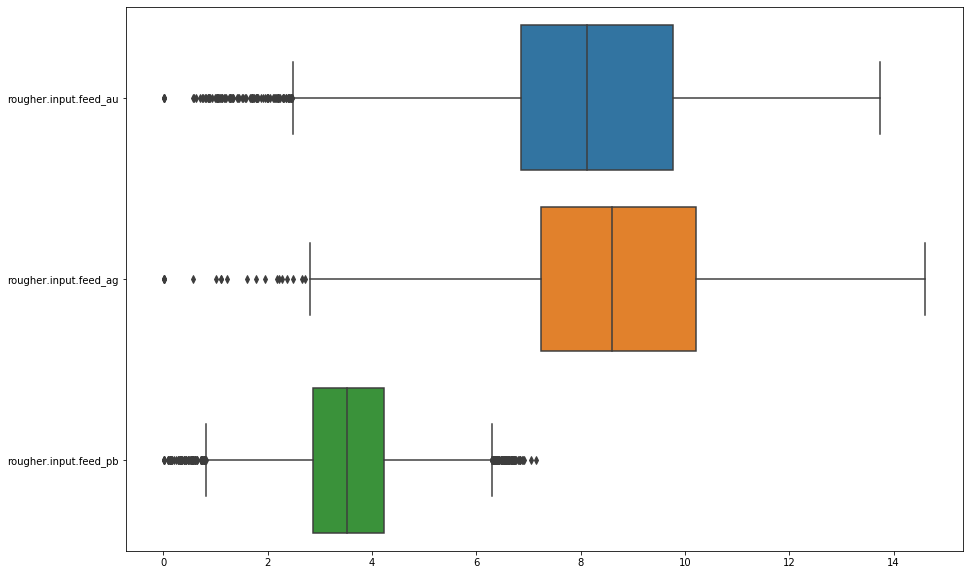

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(data=inputs, orient = 'h')

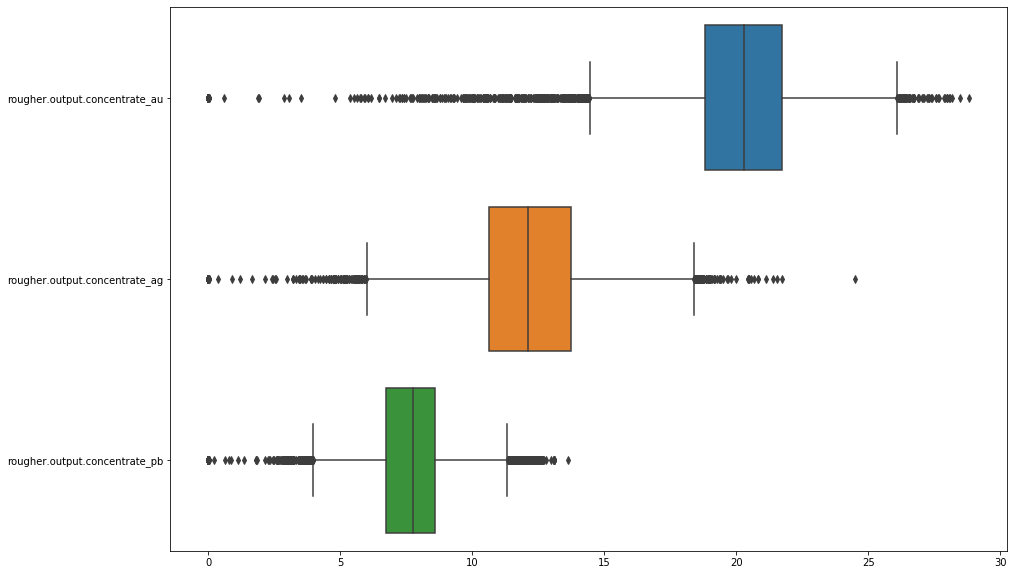

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(data=rougher, orient = 'h')

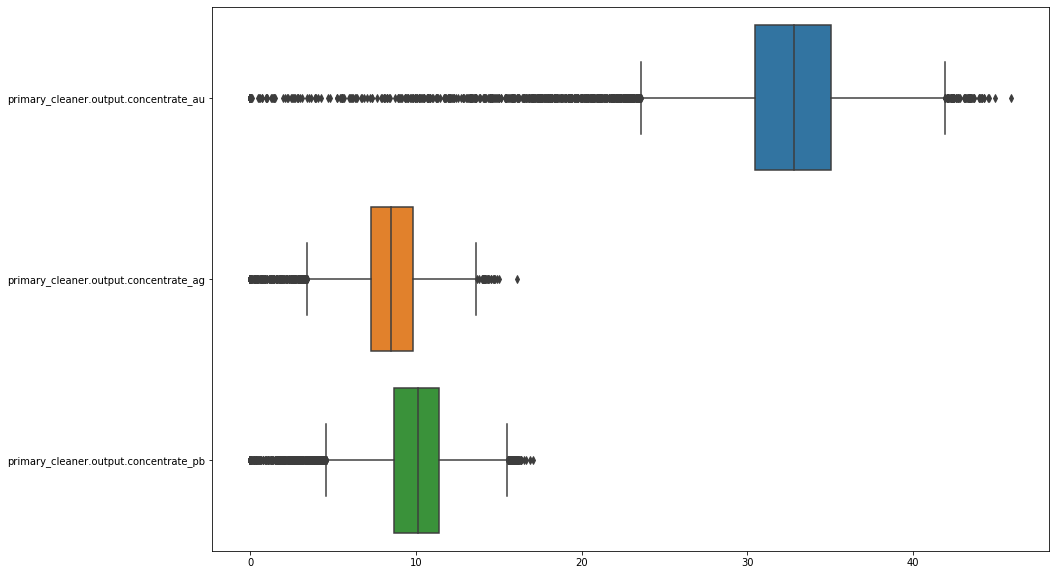

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=primary_cleaner, orient = 'h')

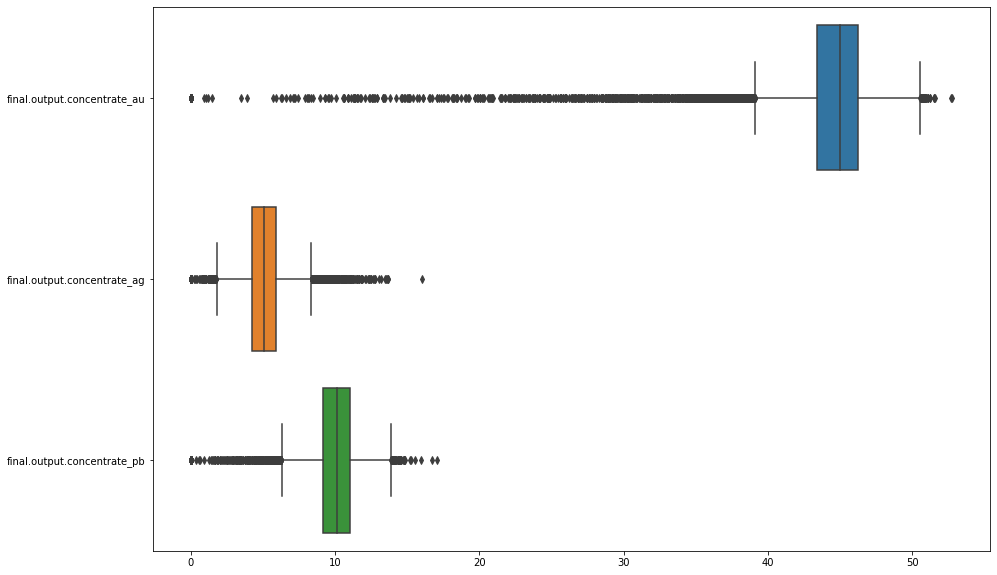

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(data=final, orient = 'h')

***Вывод*** 

Концентрация золота по этапам увеличивается с примерно 20 до 40(почти в два раза), по серебру падает на каждом этапе, по свинцу после первого этапа увеличалсь, на последнем почти не изменилась.

Text(0.5, 1.0, 'Изменение концентрации золота')

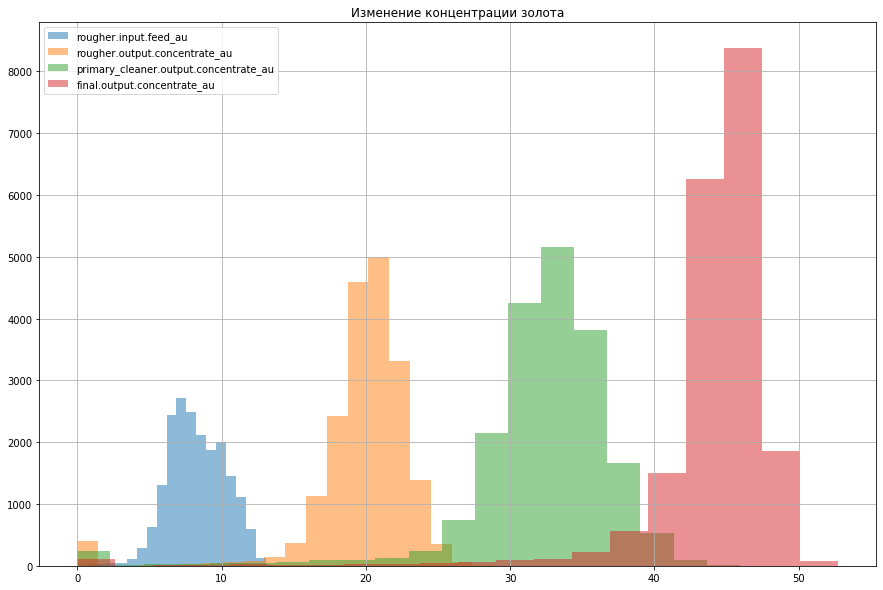

In [16]:

steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        full[step].hist(alpha=0.5, bins=100,figsize=(15,10))
    plt.legend(steps)
plot_concentrate_progress('au')
plt.title('Изменение концентрации золота')

Text(0.5, 1.0, 'Изменение концентрации серебра')

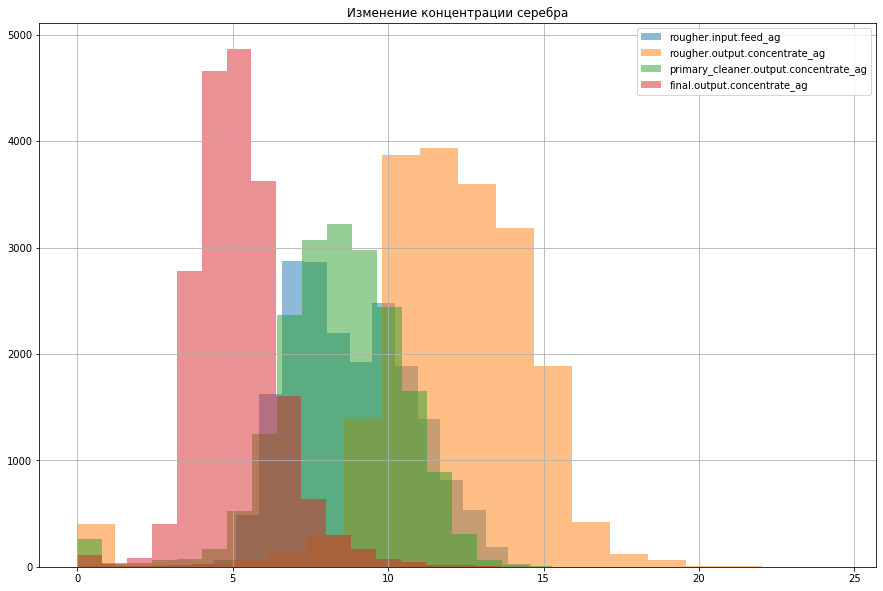

In [17]:
plot_concentrate_progress('ag')
plt.title('Изменение концентрации серебра')

Text(0.5, 1.0, 'Изменение концентрации свинца')

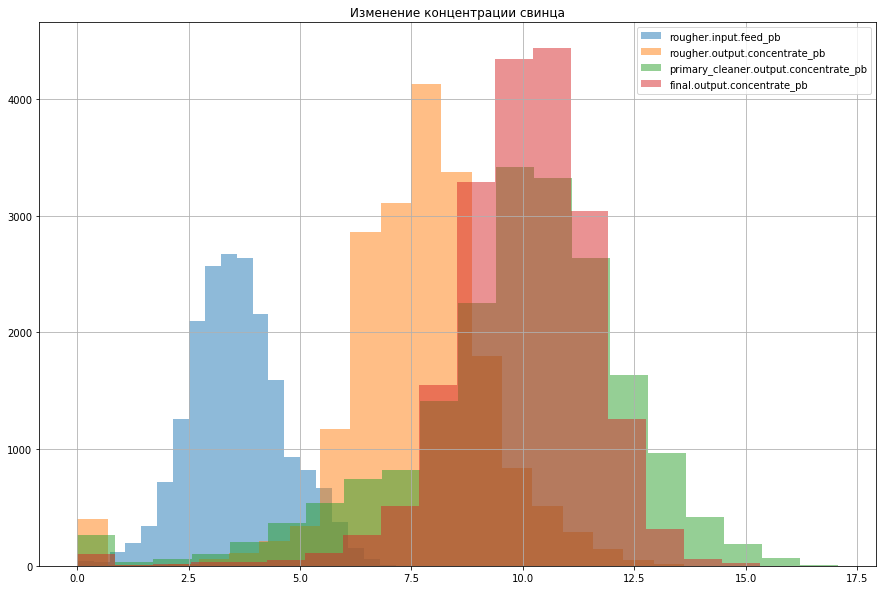

In [18]:
plot_concentrate_progress('pb')
plt.title('Изменение концентрации свинца')

**2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

* feed size — размер гранул сырья
-------------------------------------------
* rougher.input.feed_size                               
                              

In [19]:
display(train['rougher.input.feed_size'].describe())
display(test['rougher.input.feed_size'].describe())

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

**Вывод** 

И среднее и медиана у тестовой и обучающей выборки примерно идентичные, в дальнейшем с обучением модели проблем быть не должно.

**2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [20]:
rougher_sum = full['rougher.output.concentrate_au']+full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_pb']
primary_cleaner_sum = full['primary_cleaner.output.concentrate_au']+full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_pb'] 
final_sum = full['final.output.concentrate_au']+full['final.output.concentrate_ag']+full['final.output.concentrate_pb']

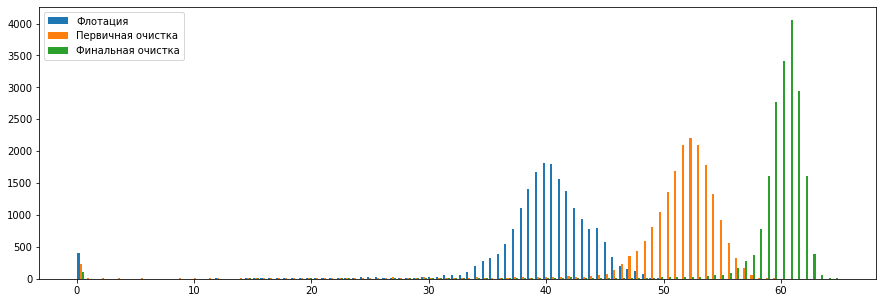

In [21]:
plt.figure(figsize=(15,5))
plt.hist([rougher_sum,primary_cleaner_sum,final_sum], bins = 100, 
          label=['Флотация','Первичная очистка', 'Финальная очистка']);
plt.legend();

***Вывод***  

Суммарная концентрация всех вещест(золото,серебро,свинец и зол) увеличивается на каждом следующем этапе. На флотации сумманая контетрация в среднем в районе 40, после первичной очистки около 55, на финальном этапе около 60. Есть небольшая группа с суммарной концентрации около 0.

## Модель

**Напишите функцию для вычисления итоговой sMAPE.**

In [22]:
def smape(target,prediction):
    rougher = 0
    final = 0
    for i in range(len(prediction)):
        rougher += abs(target['rougher.output.recovery'][i] - prediction[i][0])/((abs(target['rougher.output.recovery'][i]) + abs(prediction[i][0]))/2)*100
        
        final +=abs(target['final.output.recovery'][i] - prediction[i][1])/((abs(target['final.output.recovery'][i]) + abs(prediction[i][1]))/2)*100
    smape_rougher = rougher/len(prediction)
    
    smape_final = final/len(prediction)
    
    smape = 0.25*smape_rougher + 0.75*smape_final
    
    return smape

In [23]:
pv2 = list(set(train.columns) - set(test_2.columns))
train=train.drop(pv2, axis = 1)


In [24]:
score = make_scorer(smape,greater_is_better=False)

In [25]:
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
features_test = test_2.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)

target_train = train[['rougher.output.recovery', 'final.output.recovery']]
target_test = test_2[['rougher.output.recovery', 'final.output.recovery']]


In [26]:
model_Regres = LinearRegression()
model_Regres.fit(target_train, features_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
scores_Regres = (cross_val_score(model_Regres, features_train, target_train, cv=5,scoring=score)).mean() # < посчитайте оценки, вызвав функцию cross_value_score с пятью блоками >

scores_Regres

-12.384596104847194

In [28]:
best_score_2 = 500
best_depth_2 = 0

for depth in range(1, 6):
    model_DTR = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scores_DTR = (cross_val_score(model_DTR, features_train, target_train, cv=5,scoring=score)).mean()
    if scores_DTR < best_score_2:
        best_depth_2 = depth
        best_score_2 = scores_DTR


display("Наилучшая максимальной глубиной:", best_depth_2)
display("Наилучший smape", best_score_2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


'Наилучшая максимальной глубиной:'

1

'Наилучший smape'

-11.8142576620169

In [29]:
%%time
best_score = 500
best_est = 0
best_depth = 0


for est in range(10, 51, 10):
    for depth in range (1, 11,2):
        model_RFC = RandomForestRegressor(random_state=12345, n_estimators= est,max_depth=depth) 
        scores_RFC = (cross_val_score(model_RFC, features_train, target_train, cv=5,scoring=score)).mean()
        if scores_RFC < best_score:
            best_est = est 
            best_depth = depth
            best_score = scores_RFC

                

display("Наилучшее количество деревьев:", best_est)
display("Наилучшая максимальной глубиной:", best_depth)
display("Наилучший smape", best_score)

'Наилучшее количество деревьев:'

50

'Наилучшая максимальной глубиной:'

1

'Наилучший smape'

-11.467938848647632

CPU times: user 11min 32s, sys: 303 ms, total: 11min 32s
Wall time: 11min 32s


In [32]:
model_DTR = DecisionTreeRegressor(random_state=12345, max_depth = 1)# было 4 итог 9.77
model_DTR.fit(features_train, target_train)
prediction_DTR = model_DTR.predict(features_test)
smape(target_test, prediction_DTR)

9.39474962482239

In [34]:
model_RFC = RandomForestRegressor(random_state=12345, n_estimators= 50,max_depth=5) # было 40/5 итог 9.13
model_RFC.fit(features_train, target_train)
prediction_RFC = model_RFC.predict(features_test)
smape(target_test, prediction_RFC)

9.123372564108731

In [37]:
model_Regres.fit(features_train, target_train)
prediction_Regres = model_Regres.predict(features_test)
smape(target_test, prediction_Regres)

9.972775555351191

**Вывод :** 

Были обучены три модели: 
* Линейной регрессии 
* Случайного леса
* дерева решений

Наилучшее качество методом кросс валидации получила модель случайного леса smape равно 10,34. 
На тестовой выборке лучший smape также показала модель случайного леса smape равно 9,12